<a href="https://colab.research.google.com/github/nimratmann/SBU_Sports/blob/main/SBU_Sports.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Set Up My Environment

### Install Required Libraries

In [2]:
!pip install mysql-connector-python pandas matplotlib seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 20.6 MB/s eta 0:00:00


### Import Libraries

In [3]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Connect to My MySQL Database

### Database Connection

In [4]:
# Define connection details
username = 'student_athletics'
password = 'Ahi2024!!'
host = 'shtm-fallprev.mysql.database.azure.com'
database = 'sbu_athletics'

# Establish the connection
conn = mysql.connector.connect(
    user=username,
    password=password,
    host=host,
    database=database
)
cursor = conn.cursor()

# Step 3: Retrieve Data from SQL Tables

### Fetch Data

In [5]:
# Query players table
players_query = "SELECT * FROM players WHERE sbuid IS NOT NULL"
cursor.execute(players_query)
players_data = cursor.fetchall()
players_df = pd.DataFrame(players_data, columns=[i[0] for i in cursor.description])


In [6]:
# Query vald table
vald_query = "SELECT * FROM vald"
cursor.execute(vald_query)
vald_data = cursor.fetchall()
vald_df = pd.DataFrame(vald_data, columns=[i[0] for i in cursor.description])

# Step 4: Inspect Column Names

In [7]:
# Display the first few rows and column names of each dataframe
print("Players DataFrame")
print(players_df.head())
print(players_df.columns)

Players DataFrame
            name        sbuid        sbu_sport sbu_firstname sbu_lastname  \
0  aaliyah jones  114815105.0        Womes Lax      Aaliyah         Jones   
1   aaron clarke  115338241.0  Mens Basketball        Aaron        Clarke   
2   aaron clarke  115338241.0  Mens Basketball        Aaron        Clarke   
3   aaron clarke  115338241.0  Mens Basketball        Aaron        Clarke   
4   aaron clarke  115338241.0  Mens Basketball        Aaron        Clarke   

    source                                    id                     teams  \
0  hawkins                  JHOQuvm0VoaPMLoIav2E  ['UXZ8OLGxGhvgbRewJ2qN']   
1  hawkins                  29iSAPwOLe7R2WR6v8jD  ['2HwPMz383lpPvCUplpC6']   
2     vald  399c123b-dad4-4e0d-8d03-72094c08d3d0                      ['']   
3  kinexon                                    62                      ['']   
4     vald  07376d05-4a93-4a89-bdf7-7926d7c694e1                      ['']   

                                             group

In [8]:
# Display the first few rows and column names of each dataframe
print("\nVald DataFrame")
print(vald_df.head())
print(vald_df.columns)


Vald DataFrame
         sbuid    sbu_sport                             athleteId  \
0  115748989.0  Mens Soccer  d82c8cdb-8d4d-40ad-a02e-00386c4e7510   
1  115748989.0  Mens Soccer  d82c8cdb-8d4d-40ad-a02e-00386c4e7510   
2  115748989.0  Mens Soccer  d82c8cdb-8d4d-40ad-a02e-00386c4e7510   
3  115748989.0  Mens Soccer  d82c8cdb-8d4d-40ad-a02e-00386c4e7510   
4  115748989.0  Mens Soccer  d82c8cdb-8d4d-40ad-a02e-00386c4e7510   

                                 testId               modifiedUtc  \
0  d1dc8b4b-f563-412b-aaa8-100f295b044a  2022-01-10T17:18:51.241Z   
1  d1dc8b4b-f563-412b-aaa8-100f295b044a  2022-01-10T17:18:51.241Z   
2  d1dc8b4b-f563-412b-aaa8-100f295b044a  2022-01-10T17:18:51.241Z   
3  d1dc8b4b-f563-412b-aaa8-100f295b044a  2022-01-10T17:18:51.241Z   
4  d1dc8b4b-f563-412b-aaa8-100f295b044a  2022-01-10T17:18:51.241Z   

                testDateUtc           metric        value  
0  2022-01-10T17:10:56.344Z     leftAvgForce   418.250000  
1  2022-01-10T17:10:56.344Z      l

# Step 5: Merge DataFrames

### Merge DataFrames on Player ID


In [13]:
# Merge dataframes on 'sbuid'
merged_df = players_df.merge(vald_df, on='sbuid')

# Display the merged dataframe
print("Merged DataFrame")
print(merged_df.head())


Merged DataFrame
           name        sbuid      sbu_sport_x sbu_firstname sbu_lastname  \
0  aaron clarke  115338241.0  Mens Basketball        Aaron        Clarke   
1  aaron clarke  115338241.0  Mens Basketball        Aaron        Clarke   
2  aaron clarke  115338241.0  Mens Basketball        Aaron        Clarke   
3  aaron clarke  115338241.0  Mens Basketball        Aaron        Clarke   
4  aaron clarke  115338241.0  Mens Basketball        Aaron        Clarke   

    source                    id                     teams groups group_names  \
0  hawkins  29iSAPwOLe7R2WR6v8jD  ['2HwPMz383lpPvCUplpC6']     []          []   
1  hawkins  29iSAPwOLe7R2WR6v8jD  ['2HwPMz383lpPvCUplpC6']     []          []   
2  hawkins  29iSAPwOLe7R2WR6v8jD  ['2HwPMz383lpPvCUplpC6']     []          []   
3  hawkins  29iSAPwOLe7R2WR6v8jD  ['2HwPMz383lpPvCUplpC6']     []          []   
4  hawkins  29iSAPwOLe7R2WR6v8jD  ['2HwPMz383lpPvCUplpC6']     []          []   

                          team_names  \

In [ ]:
# Display the column names of the merged dataframe
print("Columns in merged_df:")
print(merged_df.columns)

Columns in merged_df:
Index(['name', 'sbuid', 'sbu_sport_x', 'sbu_firstname', 'sbu_lastname',
       'source', 'id', 'teams', 'groups', 'group_names', 'team_names',
       'endpointURL', 'sbu_sport_y', 'athleteId', 'testId', 'modifiedUtc',
       'testDateUtc', 'metric', 'value'],
      dtype='object')


# Step 6: Cleaning Merged Data


In [42]:
# Remove rows where 'value' is zero
filtered_data = merged_df[merged_df['value'] != 0]

# Step 7: Defining Benchmarks for Left-side Metrics by Sport

In [43]:
benchmarks = {
    'Mens Soccer': {'leftAvgForce': (300, 500), 'leftImpulse': (150, 300), 'leftMaxForce': (700, 900), 'leftTorque': (40, 70), 'leftCalibration': (0.9, 1.1)},
    'Baseball': {'leftAvgForce': (250, 400), 'leftImpulse': (100, 250), 'leftMaxForce': (600, 800), 'leftTorque': (30, 60), 'leftCalibration': (0.8, 1.2)},
    'Mens Lacrosse': {'leftAvgForce': (350, 550), 'leftImpulse': (200, 350), 'leftMaxForce': (800, 1000), 'leftTorque': (50, 80), 'leftCalibration': (0.9, 1.1)},
    'Football': {'leftAvgForce': (400, 600), 'leftImpulse': (250, 400), 'leftMaxForce': (900, 1200), 'leftTorque': (60, 100), 'leftCalibration': (0.8, 1.2)},
    'Womens Lacrosse': {'leftAvgForce': (300, 450), 'leftImpulse': (150, 300), 'leftMaxForce': (700, 900), 'leftTorque': (40, 70), 'leftCalibration': (0.9, 1.1)},
    'Womens Basketball': {'leftAvgForce': (350, 500), 'leftImpulse': (200, 350), 'leftMaxForce': (800, 1000), 'leftTorque': (50, 80), 'leftCalibration': (0.9, 1.1)},
    'Mens Basketball': {'leftAvgForce': (400, 550), 'leftImpulse': (250, 400), 'leftMaxForce': (900, 1100), 'leftTorque': (60, 90), 'leftCalibration': (0.8, 1.2)},
    'Womens Soccer': {'leftAvgForce': (300, 450), 'leftImpulse': (150, 300), 'leftMaxForce': (700, 900), 'leftTorque': (40, 70), 'leftCalibration': (0.9, 1.1)},
    'Swimming': {'leftAvgForce': (250, 400), 'leftImpulse': (100, 250), 'leftMaxForce': (600, 800), 'leftTorque': (30, 60), 'leftCalibration': (0.8, 1.2)},
    'Track and Field': {'leftAvgForce': (350, 550), 'leftImpulse': (200, 350), 'leftMaxForce': (800, 1000), 'leftTorque': (50, 80), 'leftCalibration': (0.9, 1.1)},
    'Womens Volleyball': {'leftAvgForce': (300, 450), 'leftImpulse': (150, 300), 'leftMaxForce': (700, 900), 'leftTorque': (40, 70), 'leftCalibration': (0.9, 1.1)}
}


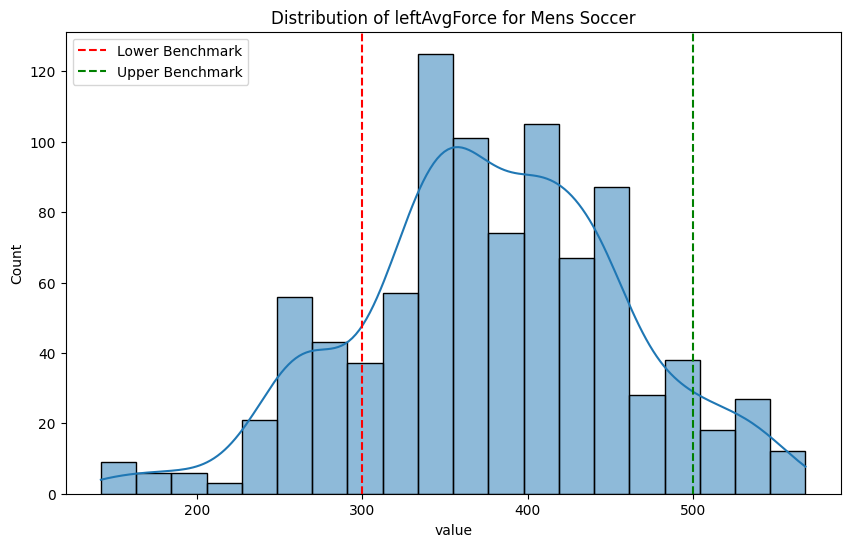

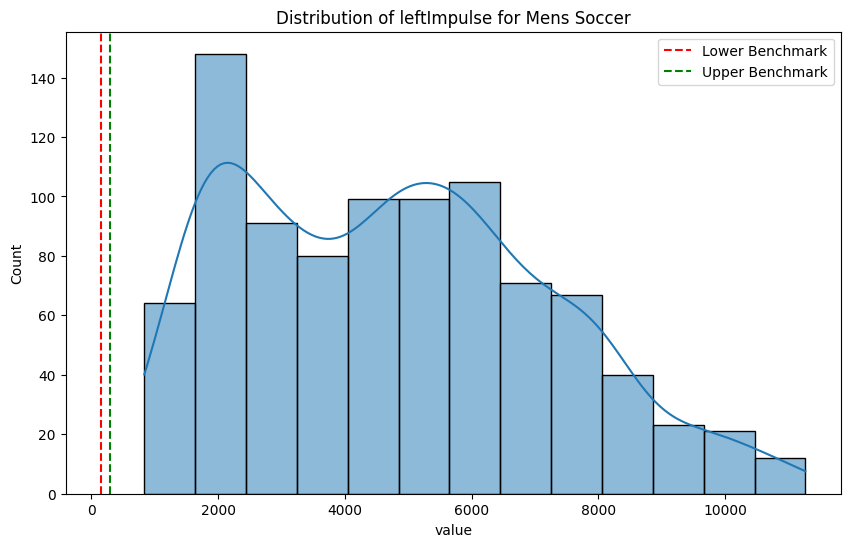

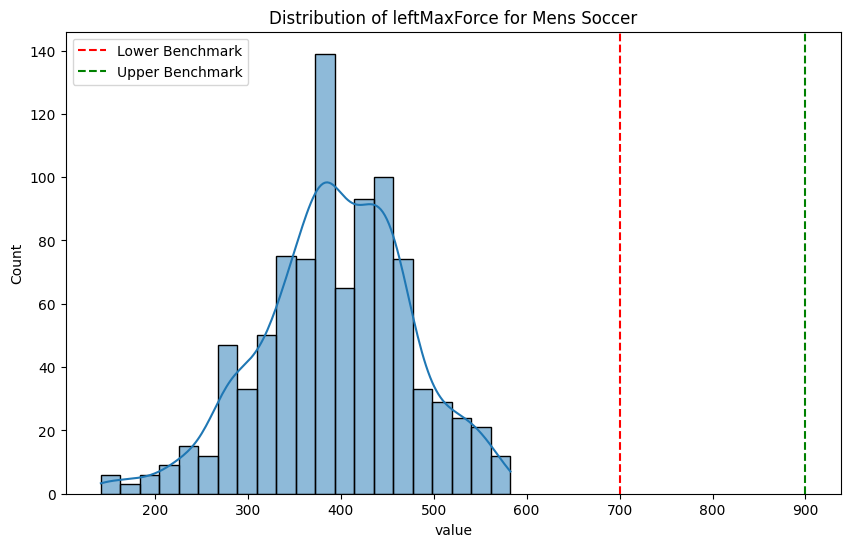

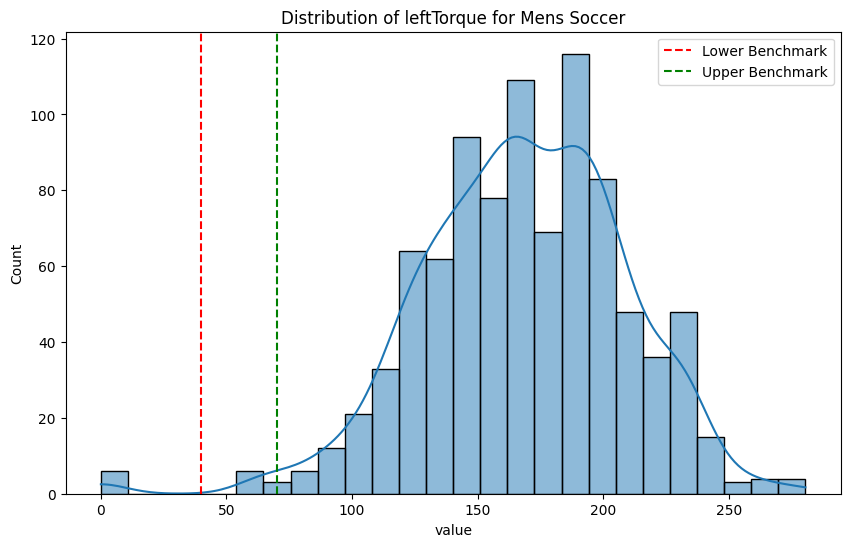

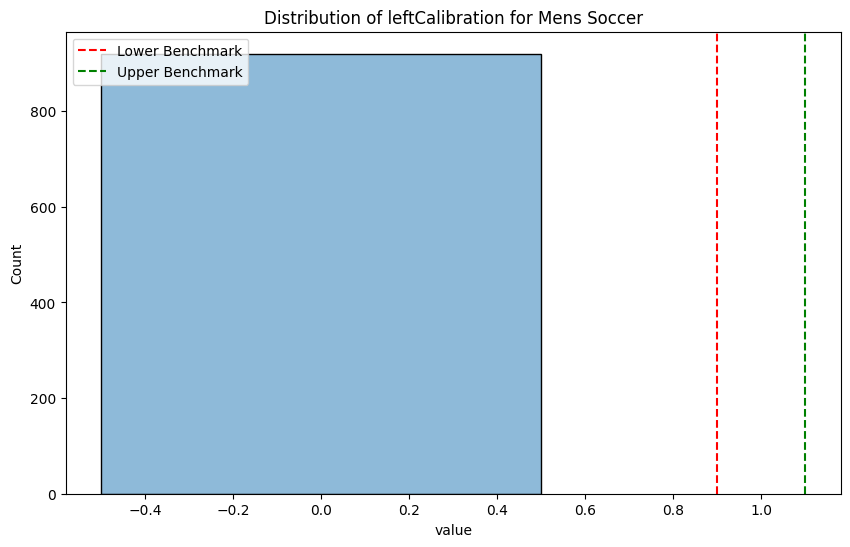

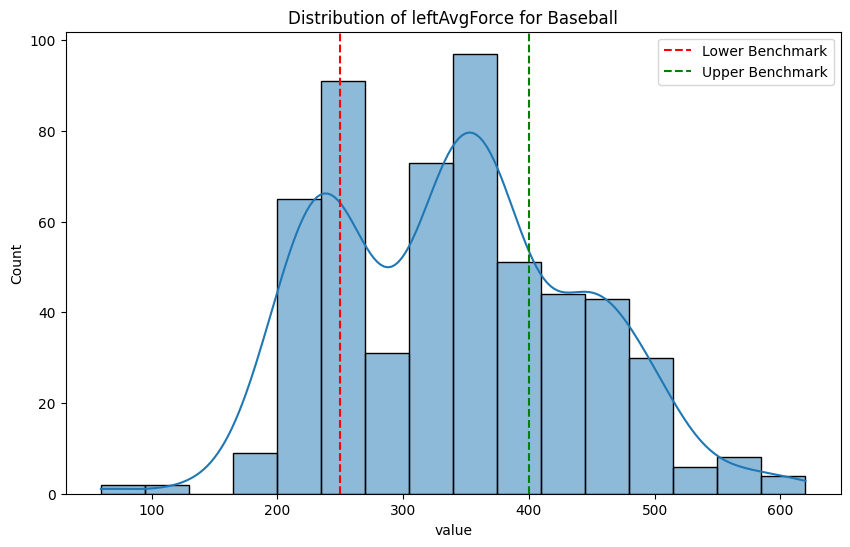

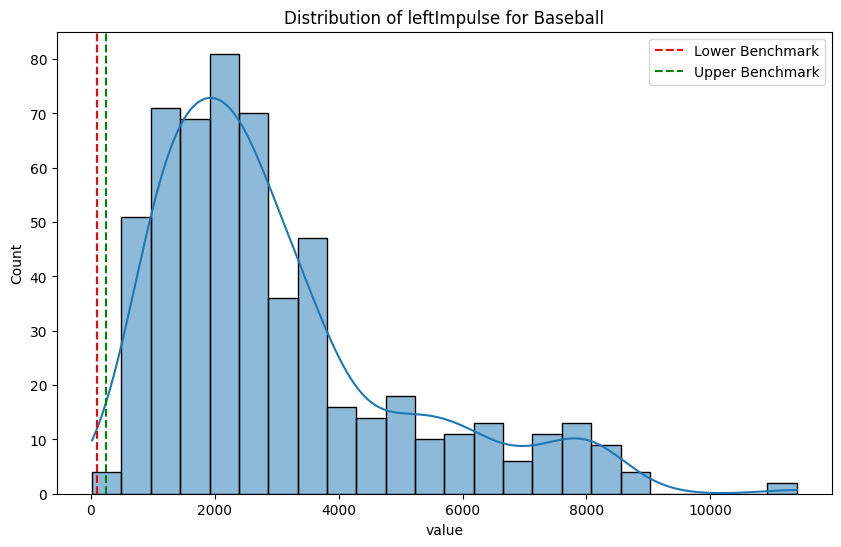

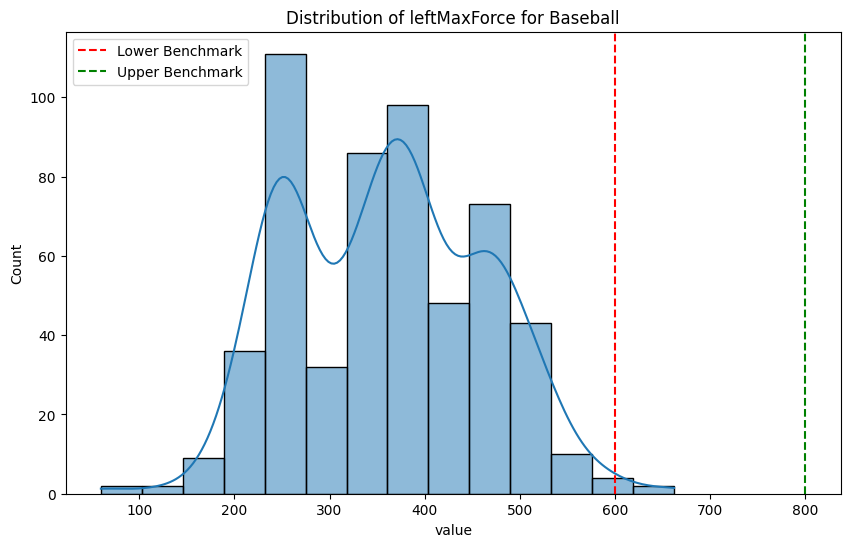

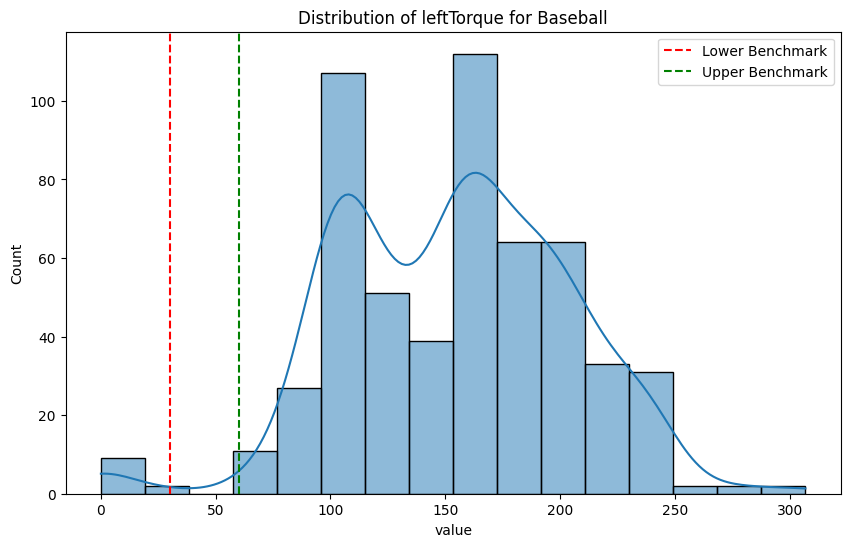

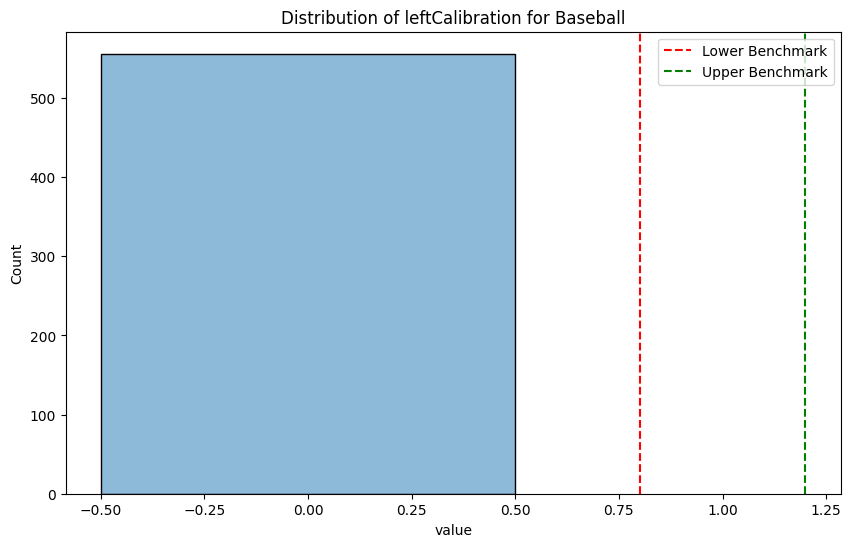

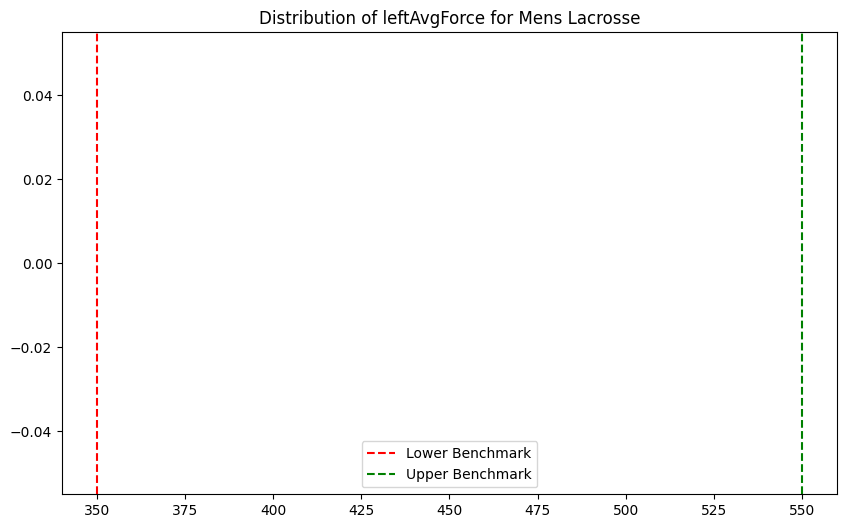

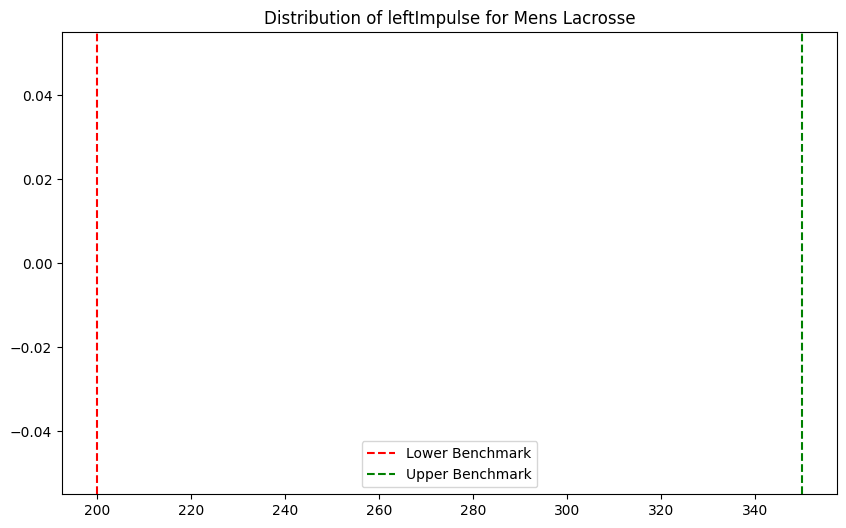

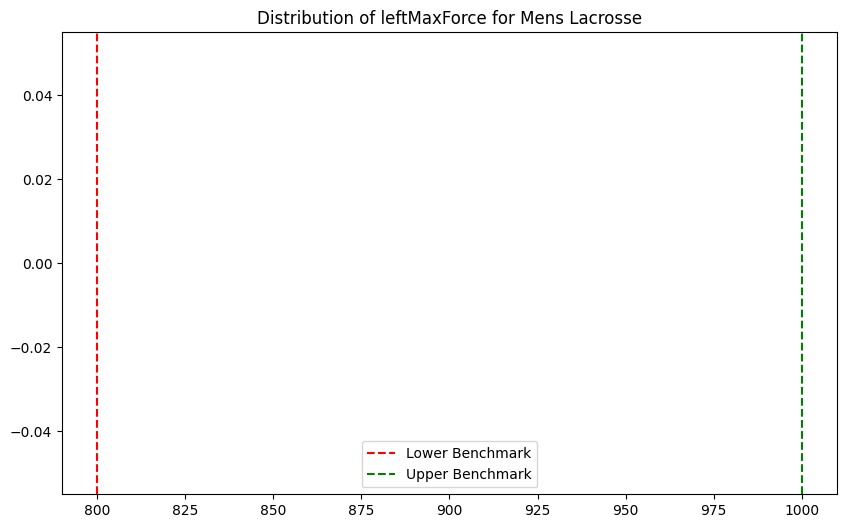

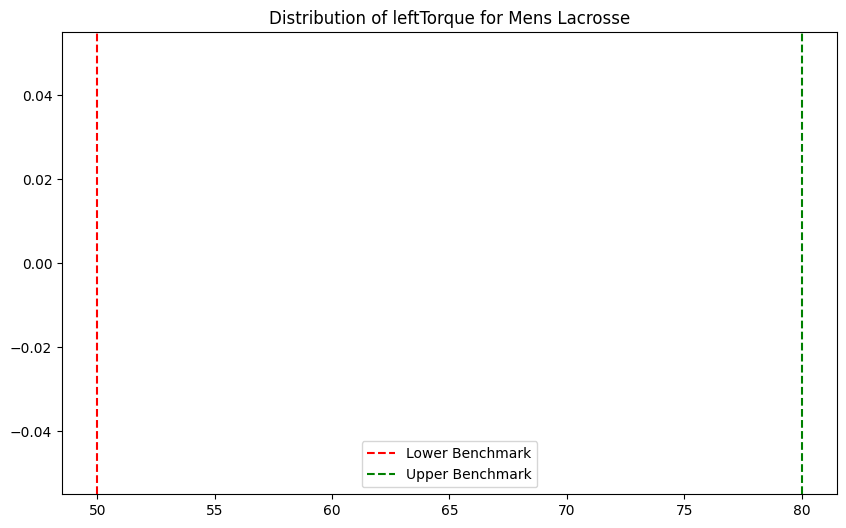

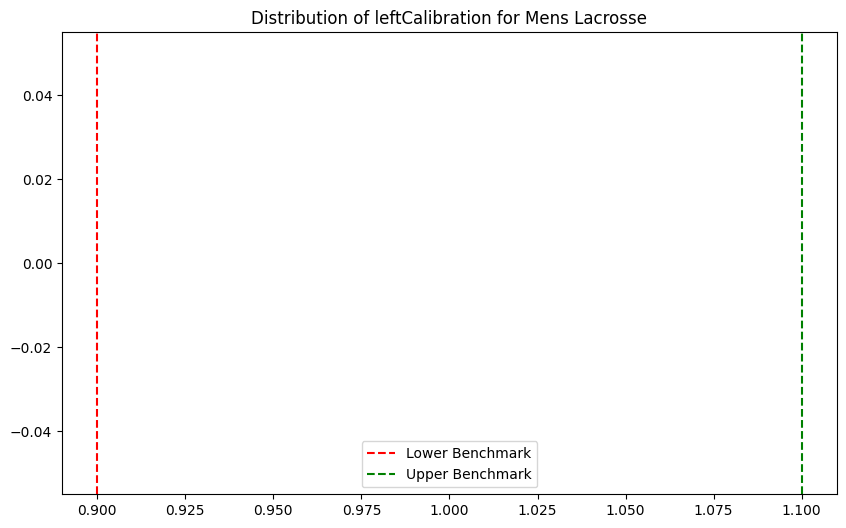

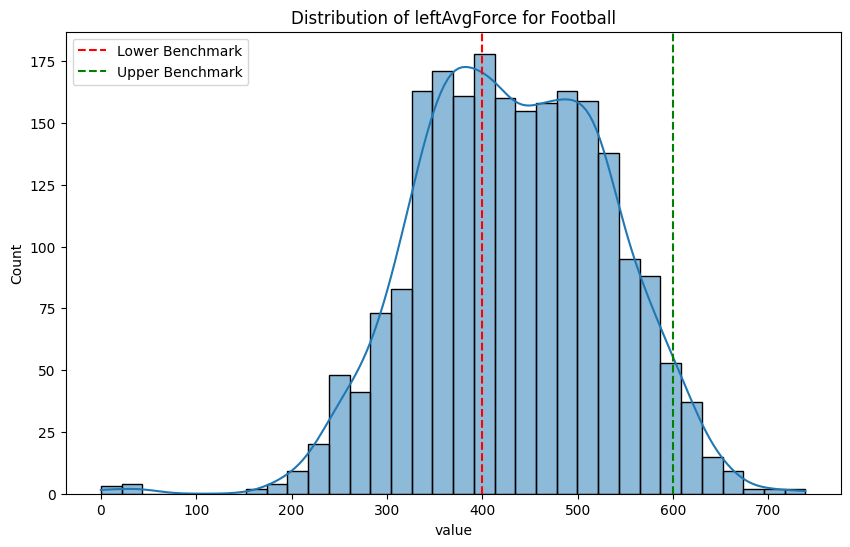

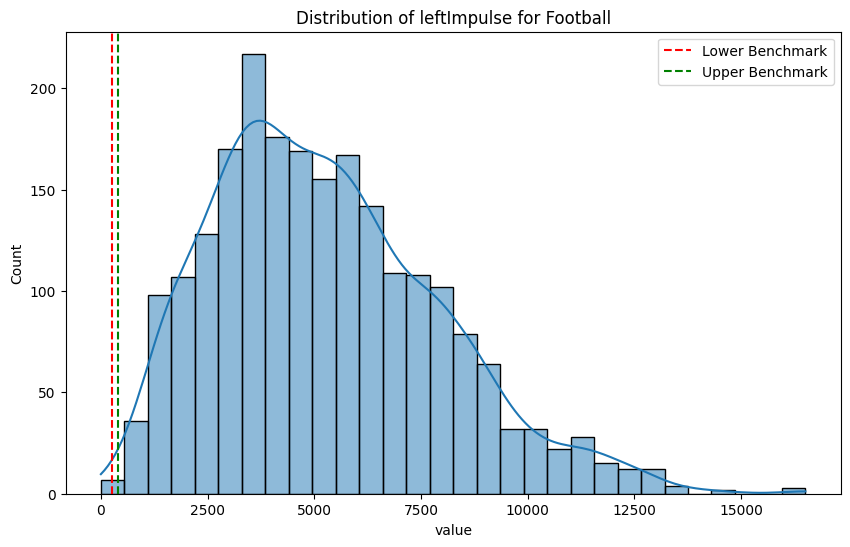

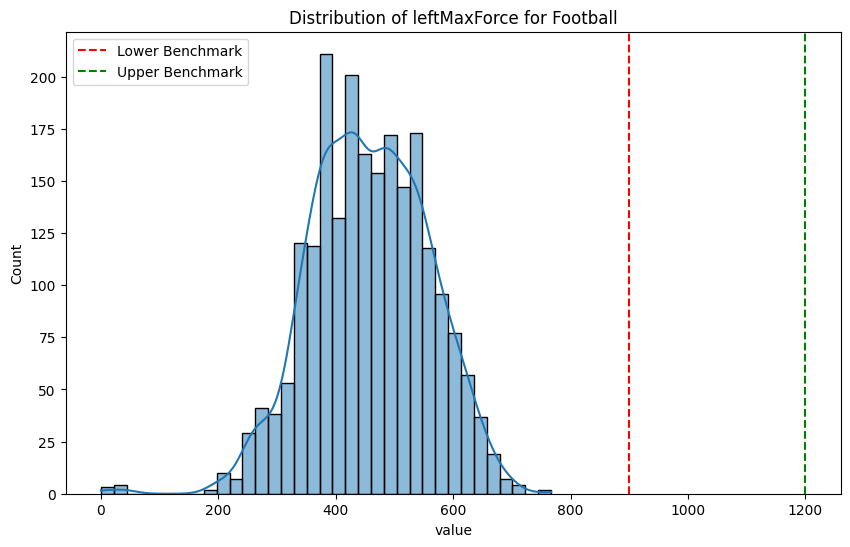

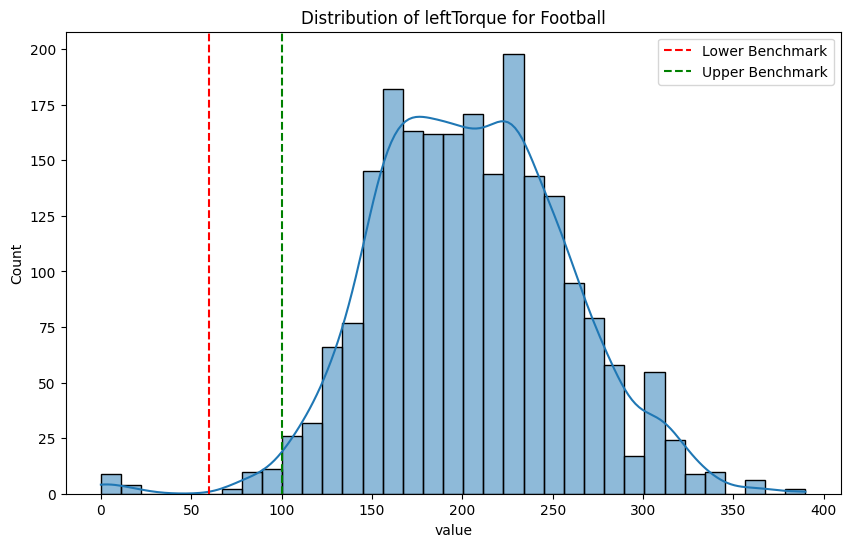

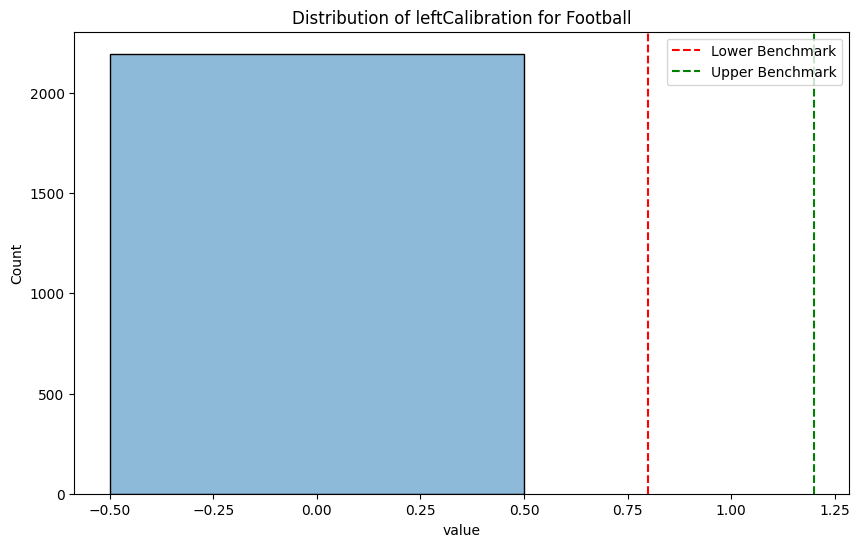

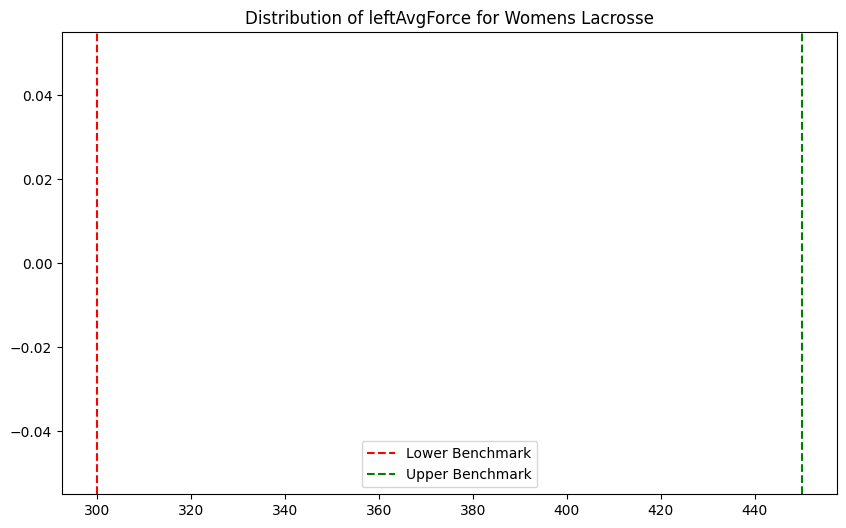

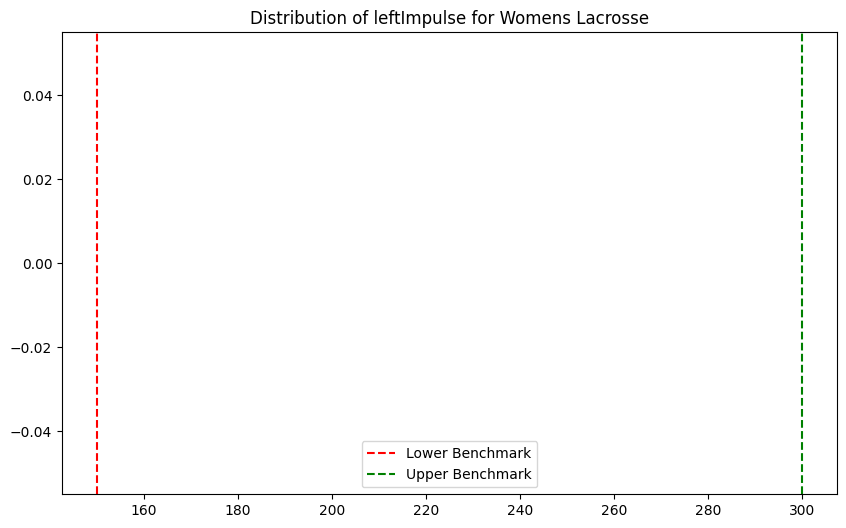

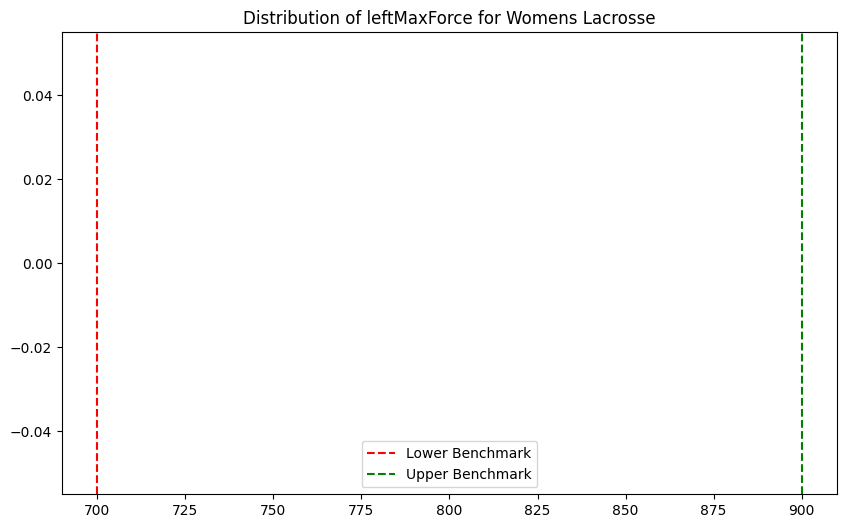

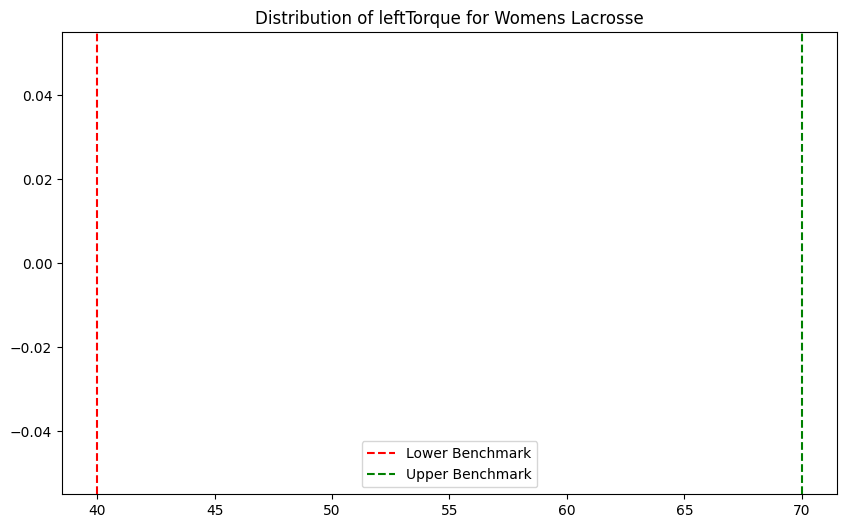

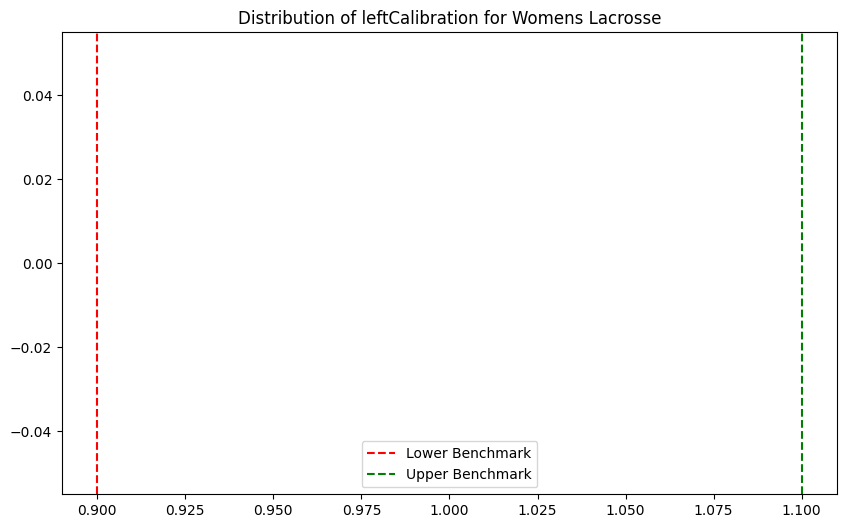

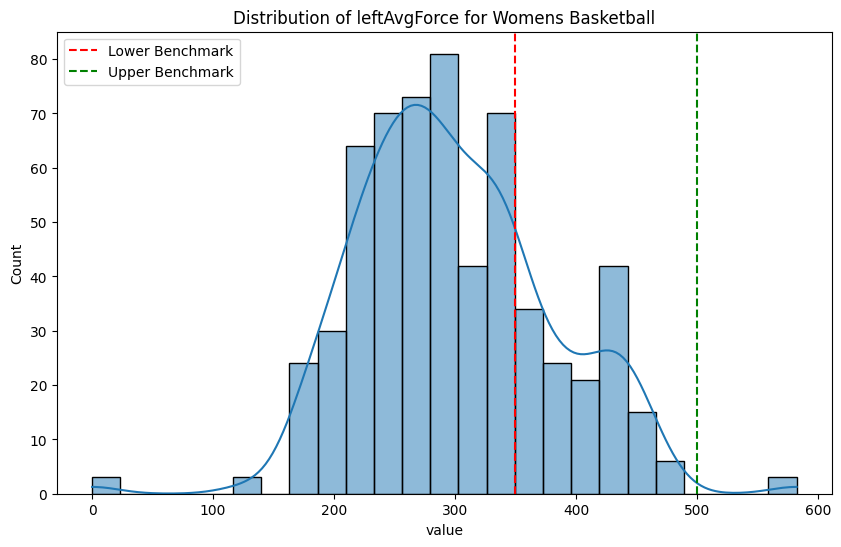

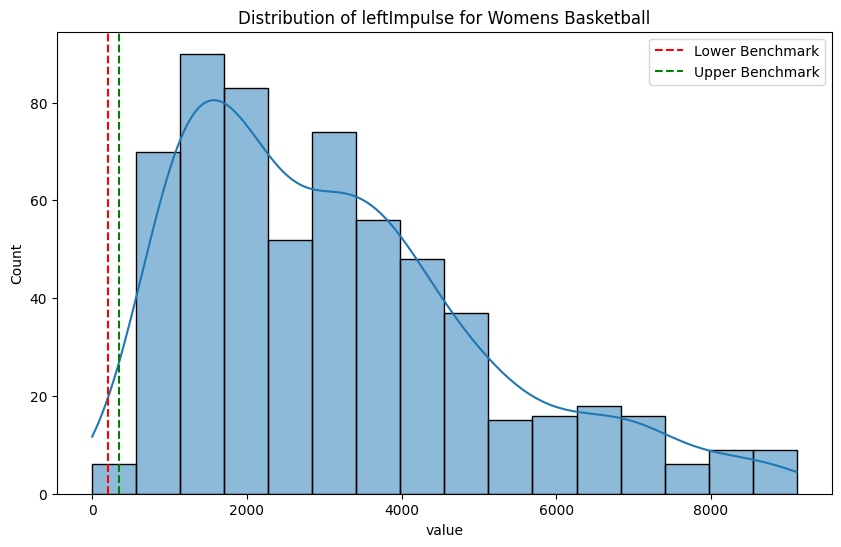

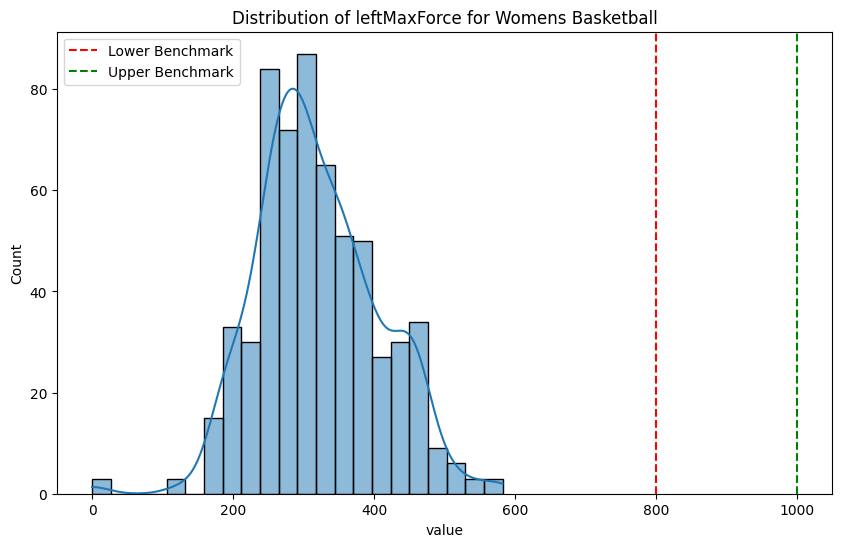

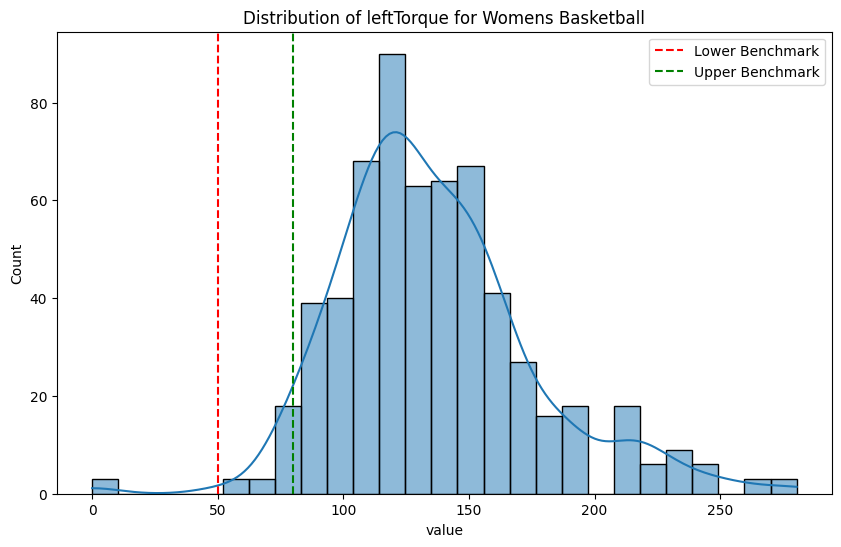

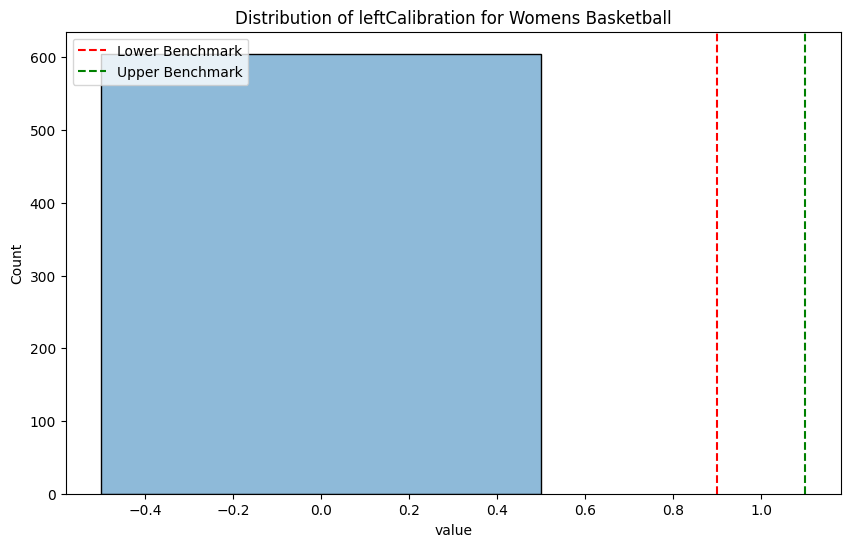

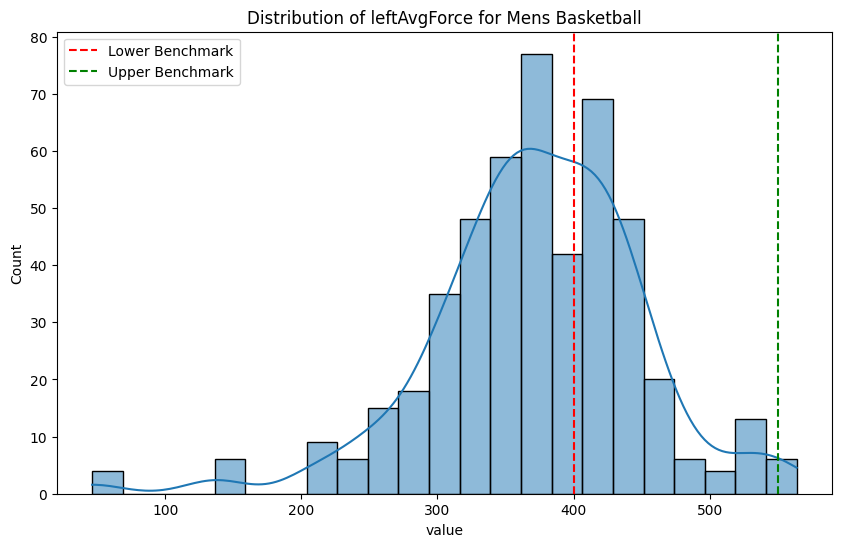

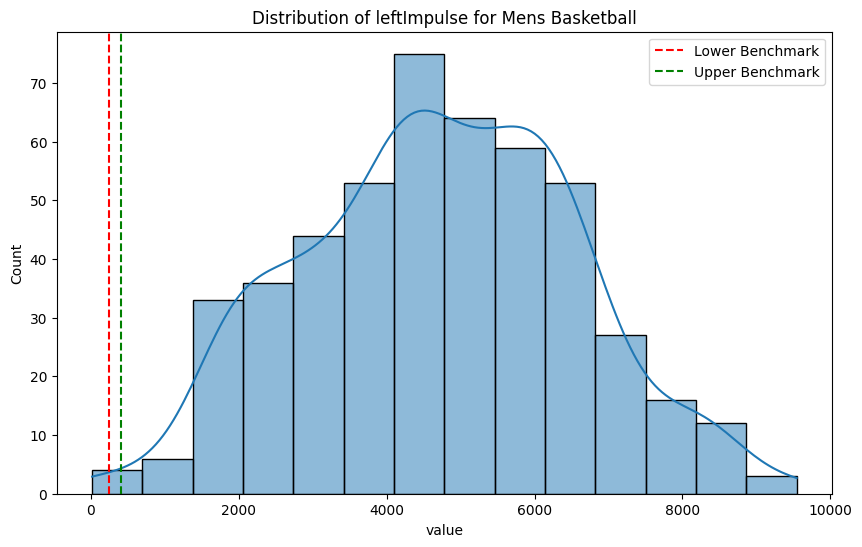

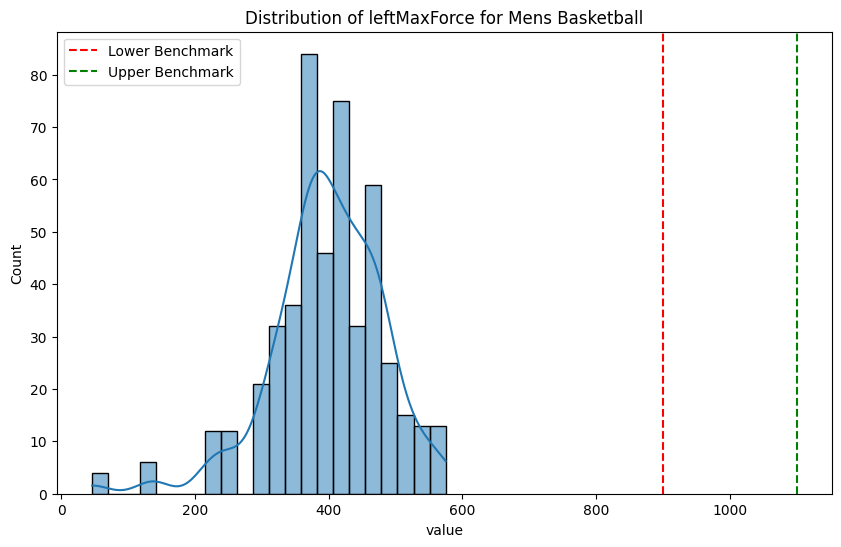

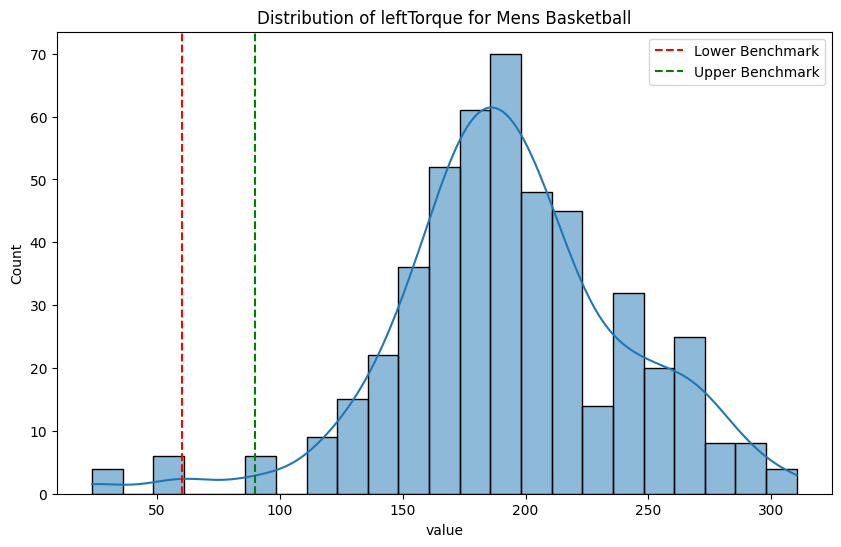

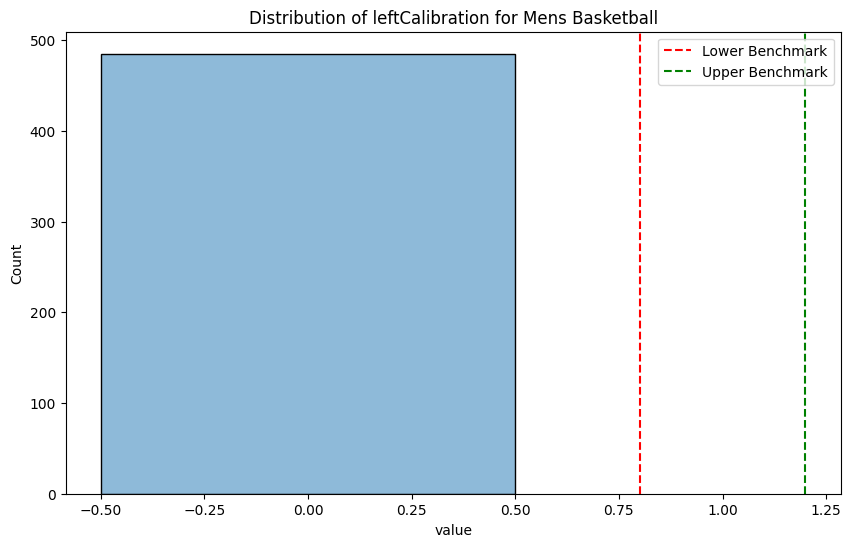

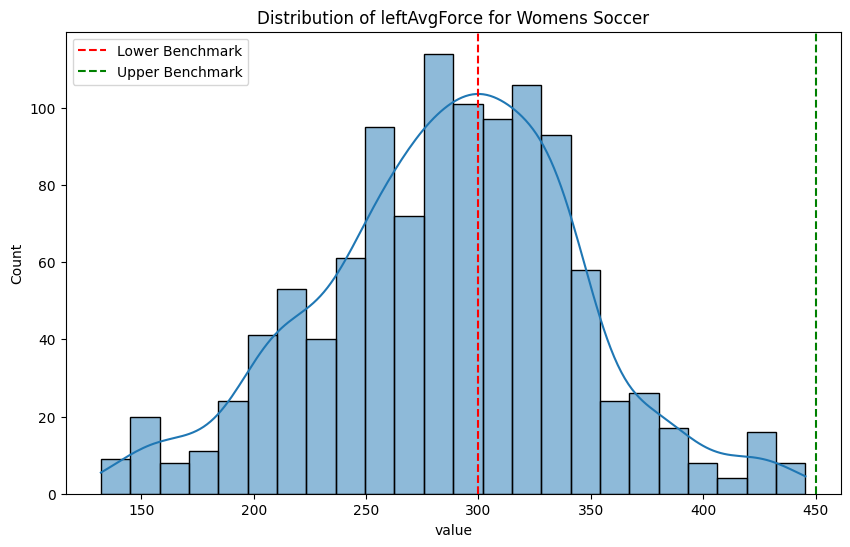

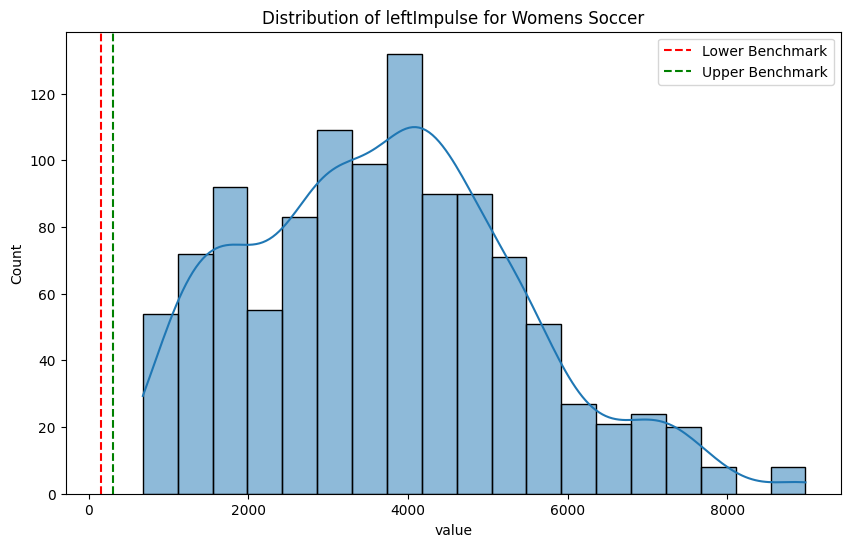

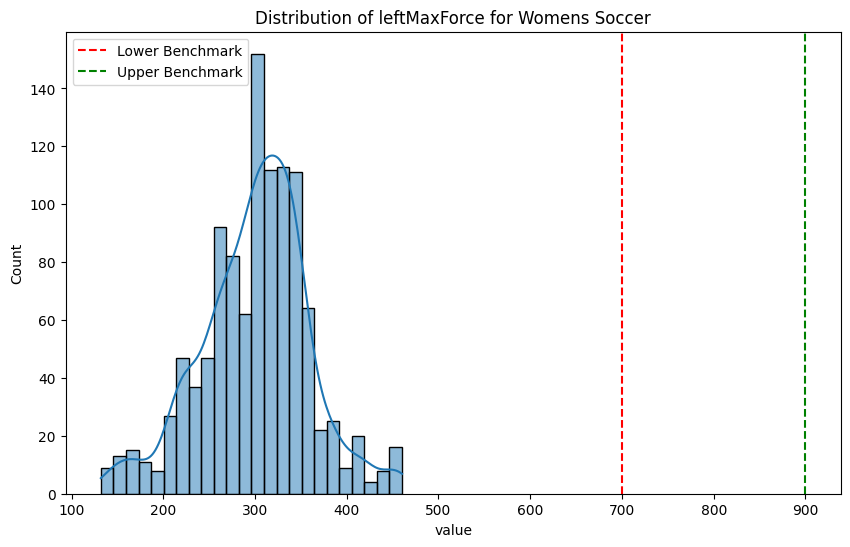

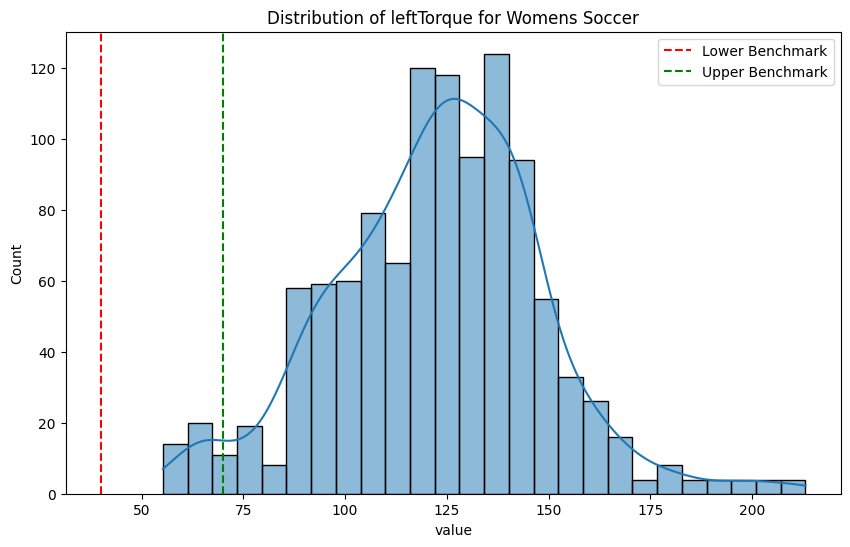

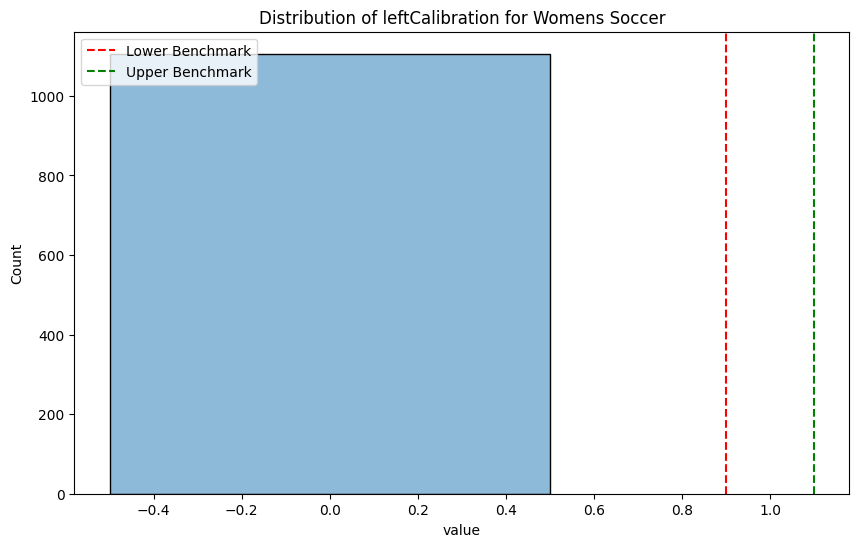

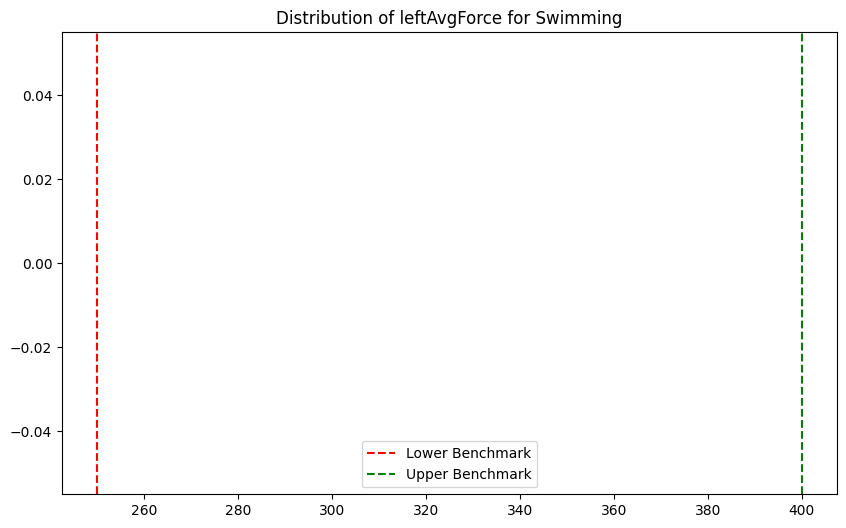

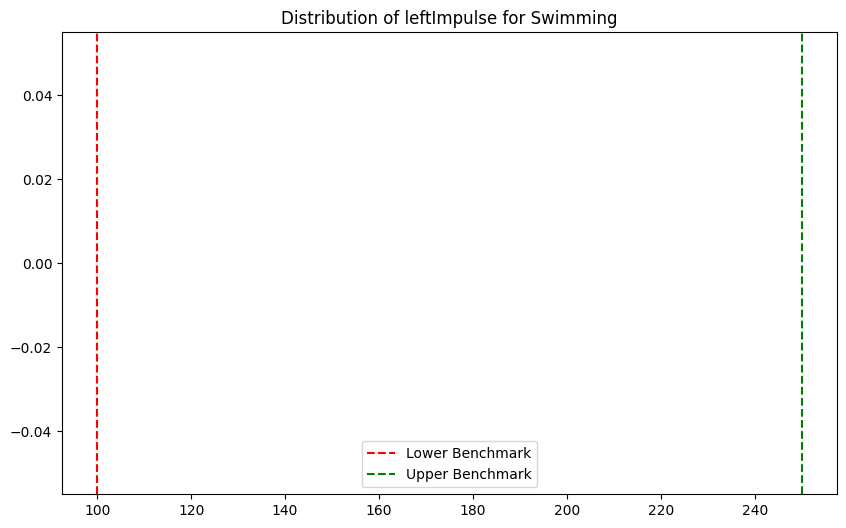

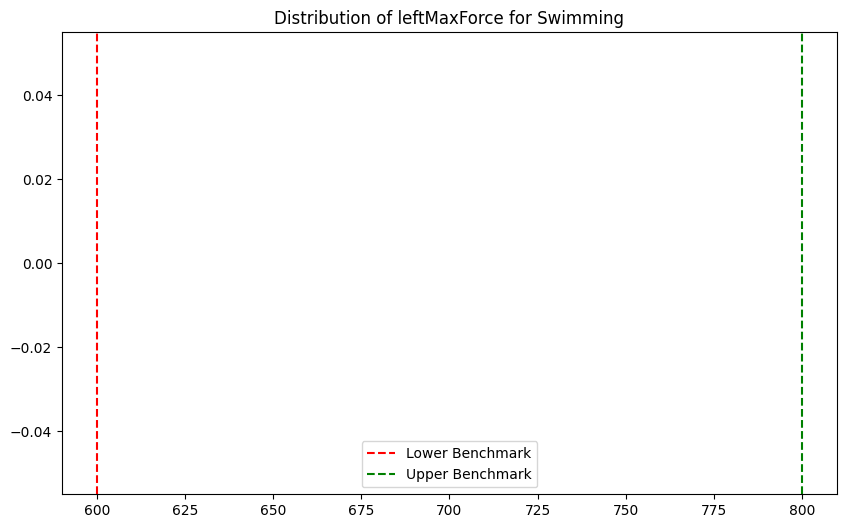

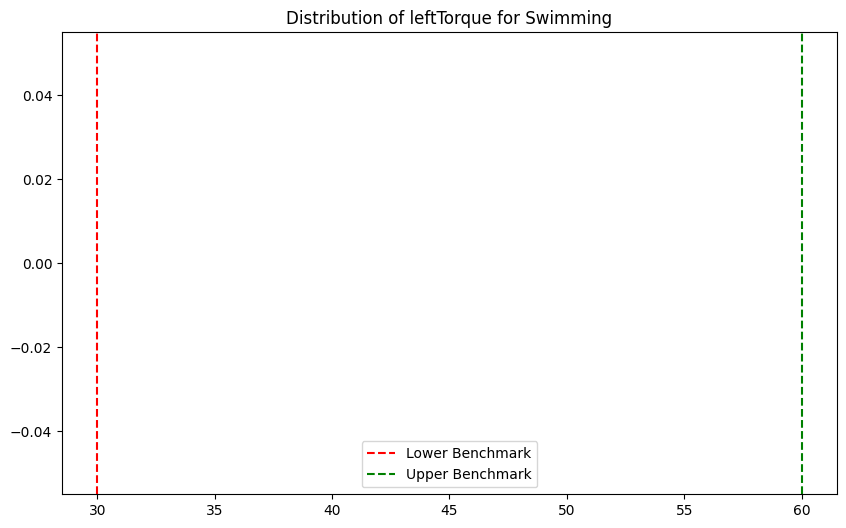

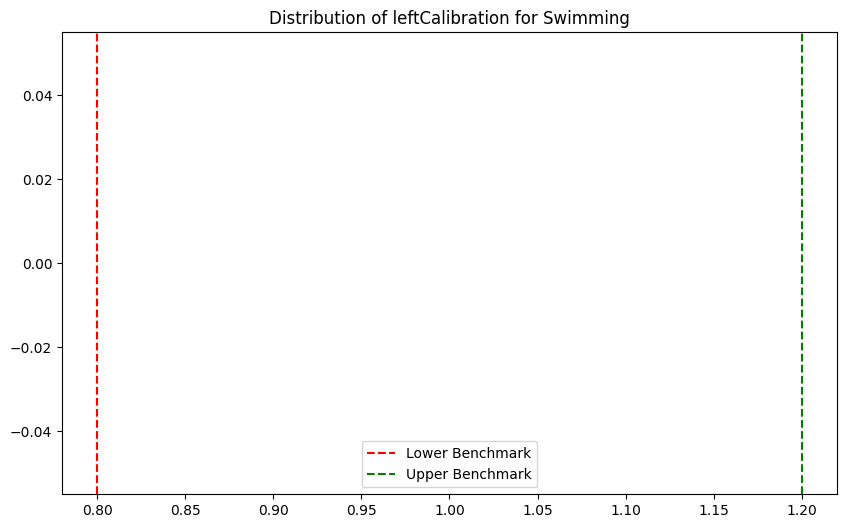

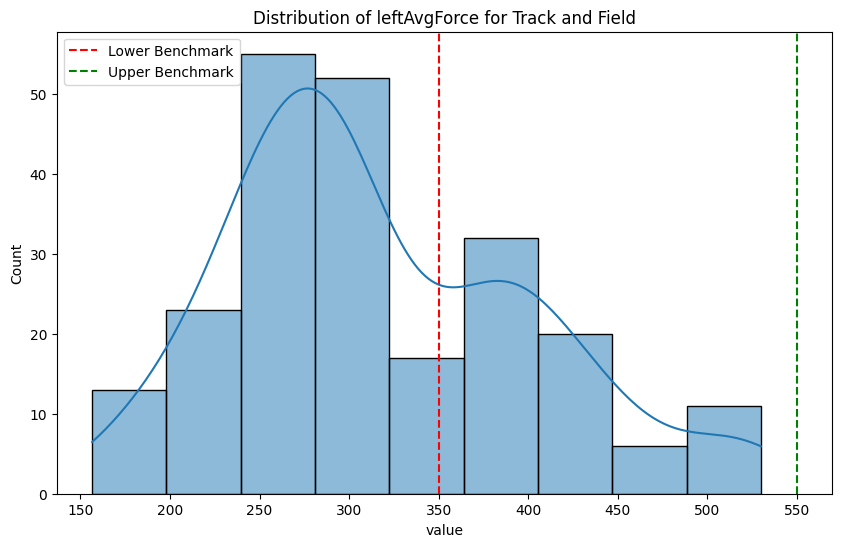

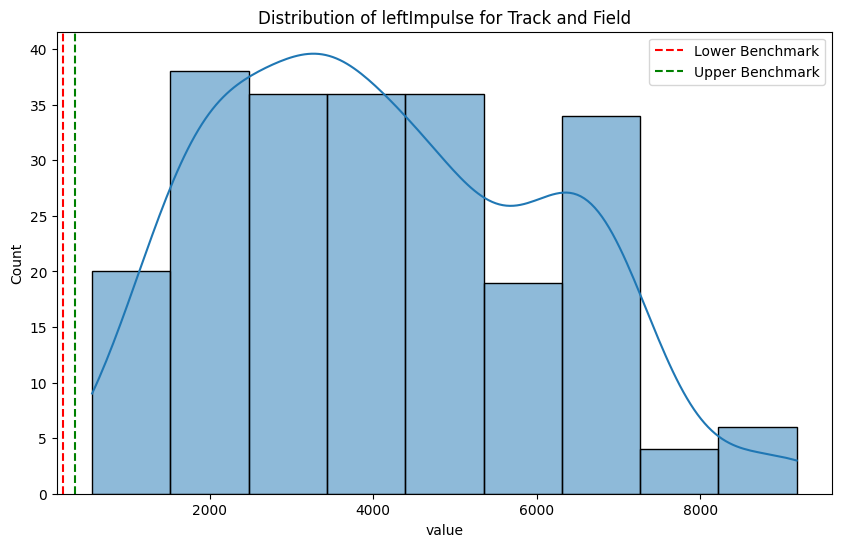

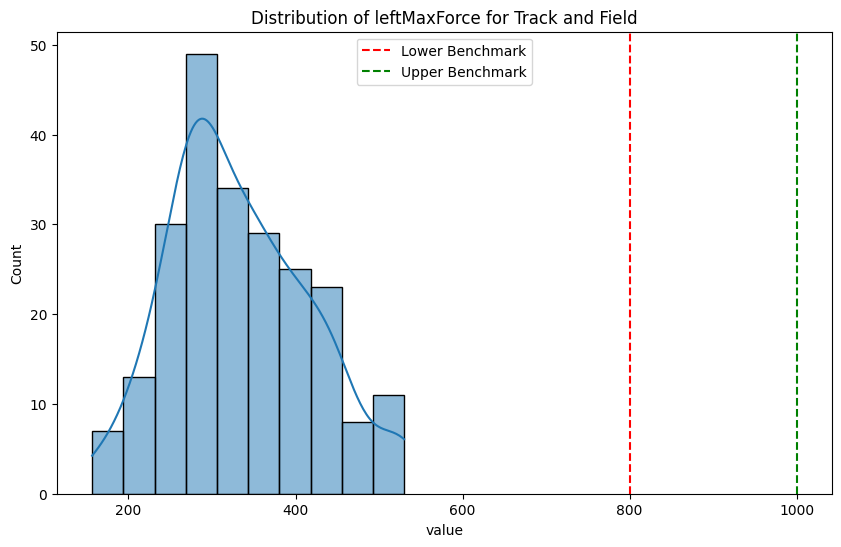

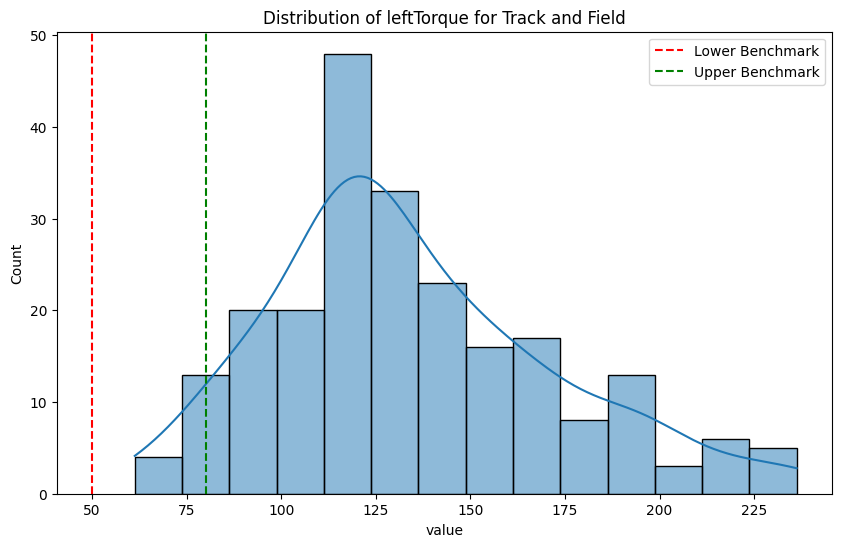

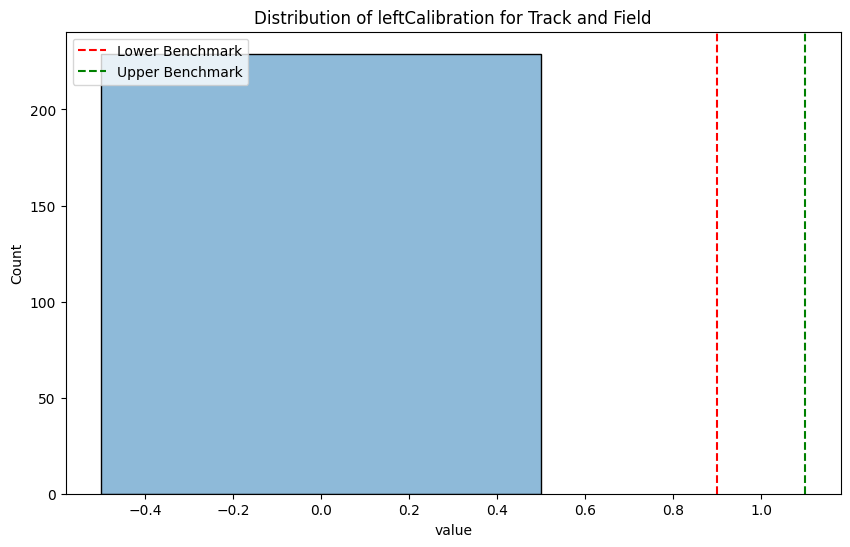

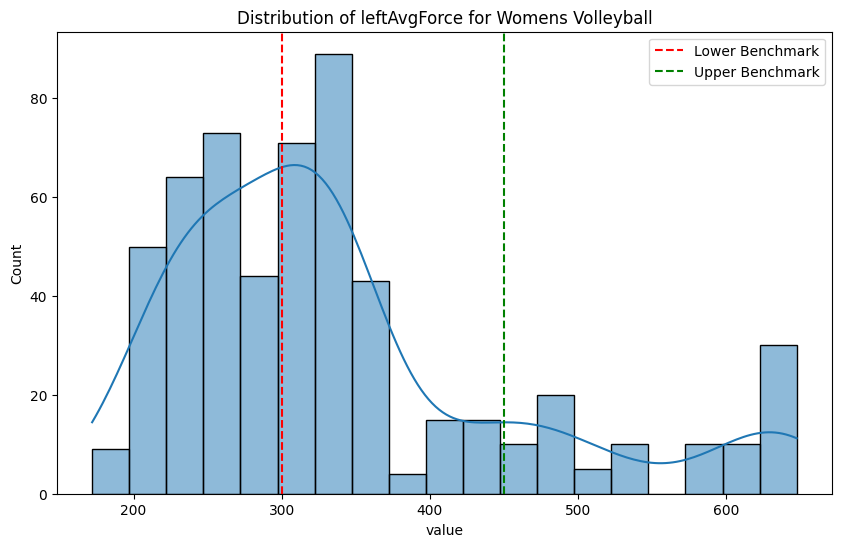

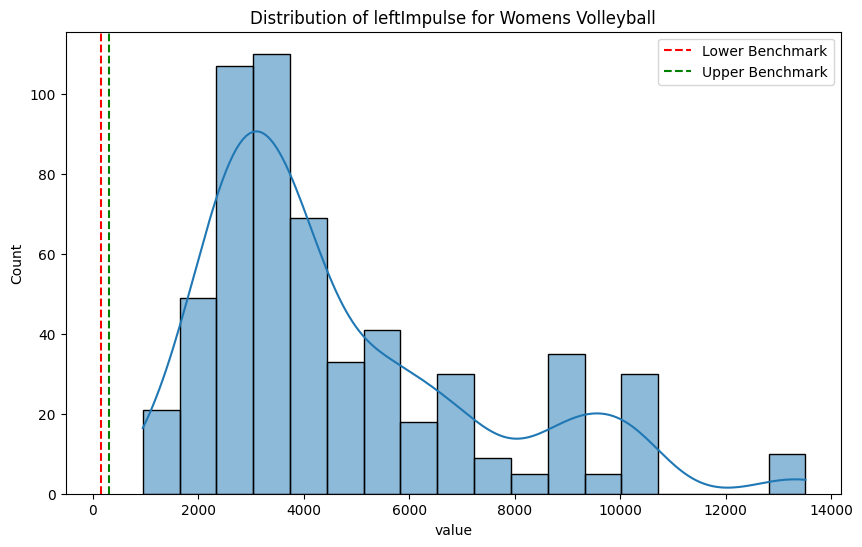

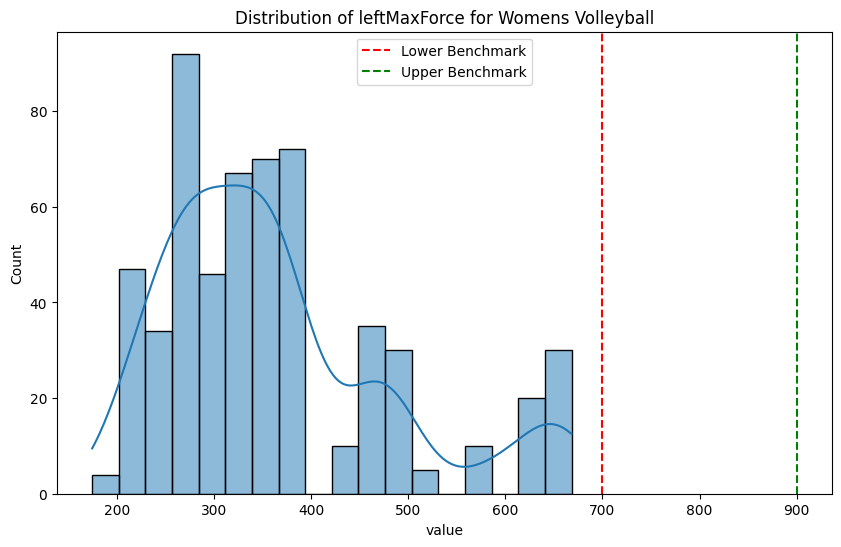

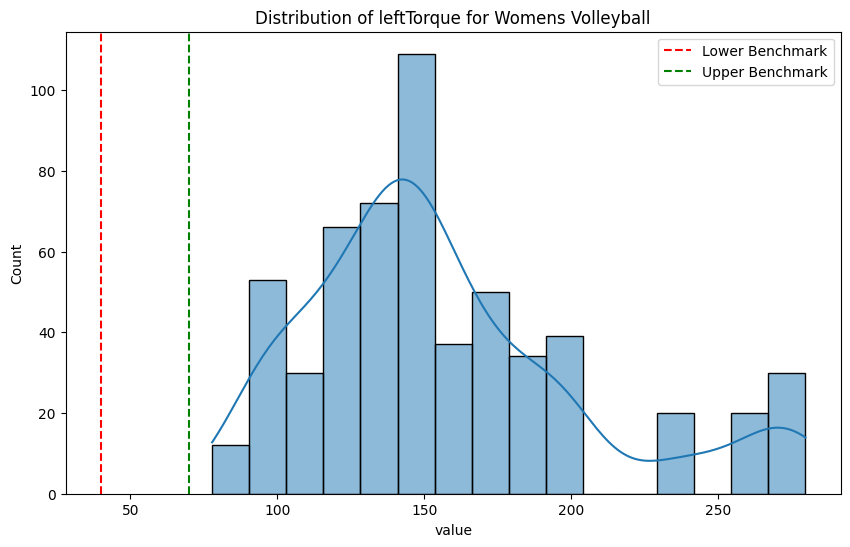

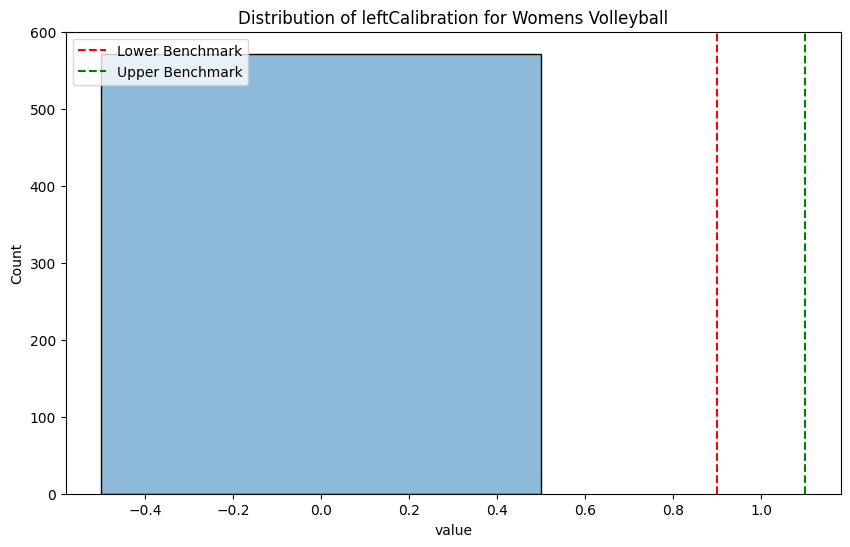

In [44]:
# Visualize the distribution of each metric to understand if the benchmarks are reasonable
for sport, metrics in benchmarks.items():
    for metric in metrics.keys():
        plt.figure(figsize=(10, 6))
        data = merged_df[(merged_df['sbu_sport_x'] == sport) & (merged_df['metric'] == metric)]['value']
        sns.histplot(data, kde=True)
        plt.title(f'Distribution of {metric} for {sport}')
        plt.axvline(x=metrics[metric][0], color='r', linestyle='--', label='Lower Benchmark')
        plt.axvline(x=metrics[metric][1], color='g', linestyle='--', label='Upper Benchmark')
        plt.legend()
        plt.show()

# Step 8: Comparison

In [45]:
comparison_results = []

In [58]:
# Compare each athlete's performance to the benchmarks
for sport, metrics in benchmarks.items():
    for metric, (lower, upper) in metrics.items():
        sport_metric_data = filtered_data[(filtered_data['sbu_sport_x'] == sport) & (filtered_data['metric'] == metric)].copy()
        sport_metric_data.loc[:, 'within_benchmark'] = sport_metric_data['value'].apply(lambda x: lower <= x <= upper)
        comparison_results.append(sport_metric_data)

In [56]:
# Combine comparison results
comparison_df = pd.concat(comparison_results)

# Step 9: Calculations

In [48]:
# Calculate the percentage of athletes meeting benchmarks for each sport and metric
benchmark_summary = comparison_df.groupby(['sbu_sport_x', 'metric'])['within_benchmark'].mean().reset_index()
benchmark_summary['percentage_within_benchmark'] = benchmark_summary['within_benchmark'] * 100

In [49]:
# Identify the best and worst-performing teams
team_performance = benchmark_summary.groupby('sbu_sport_x')['percentage_within_benchmark'].mean().reset_index()
best_team = team_performance.sort_values(by='percentage_within_benchmark', ascending=False).iloc[0]
worst_team = team_performance.sort_values(by='percentage_within_benchmark').iloc[0]

print("Best Performing Team:", best_team)
print("Worst Performing Team:", worst_team)

Best Performing Team: sbu_sport_x                    Mens Soccer
percentage_within_benchmark      15.695652
Name: 3, dtype: object
Worst Performing Team: sbu_sport_x                    Womens Basketball
percentage_within_benchmark             5.487603
Name: 5, dtype: object


In [50]:
# Highlight teams that need improvement in specific metrics
metrics_needing_improvement = benchmark_summary[benchmark_summary['percentage_within_benchmark'] < 50]

print("Teams needing improvement in specific metrics:")
print(metrics_needing_improvement)

Teams needing improvement in specific metrics:
          sbu_sport_x           metric within_benchmark  \
0            Baseball     leftAvgForce         0.491007   
1            Baseball  leftCalibration              0.0   
2            Baseball      leftImpulse              0.0   
3            Baseball     leftMaxForce         0.007194   
4            Baseball       leftTorque         0.003597   
6            Football  leftCalibration              0.0   
7            Football      leftImpulse              0.0   
8            Football     leftMaxForce              0.0   
9            Football       leftTorque         0.010474   
10    Mens Basketball     leftAvgForce         0.373196   
11    Mens Basketball  leftCalibration              0.0   
12    Mens Basketball      leftImpulse              0.0   
13    Mens Basketball     leftMaxForce              0.0   
14    Mens Basketball       leftTorque              0.0   
16        Mens Soccer  leftCalibration              0.0   
17       

# Step 10: Exploratory Data Analysis

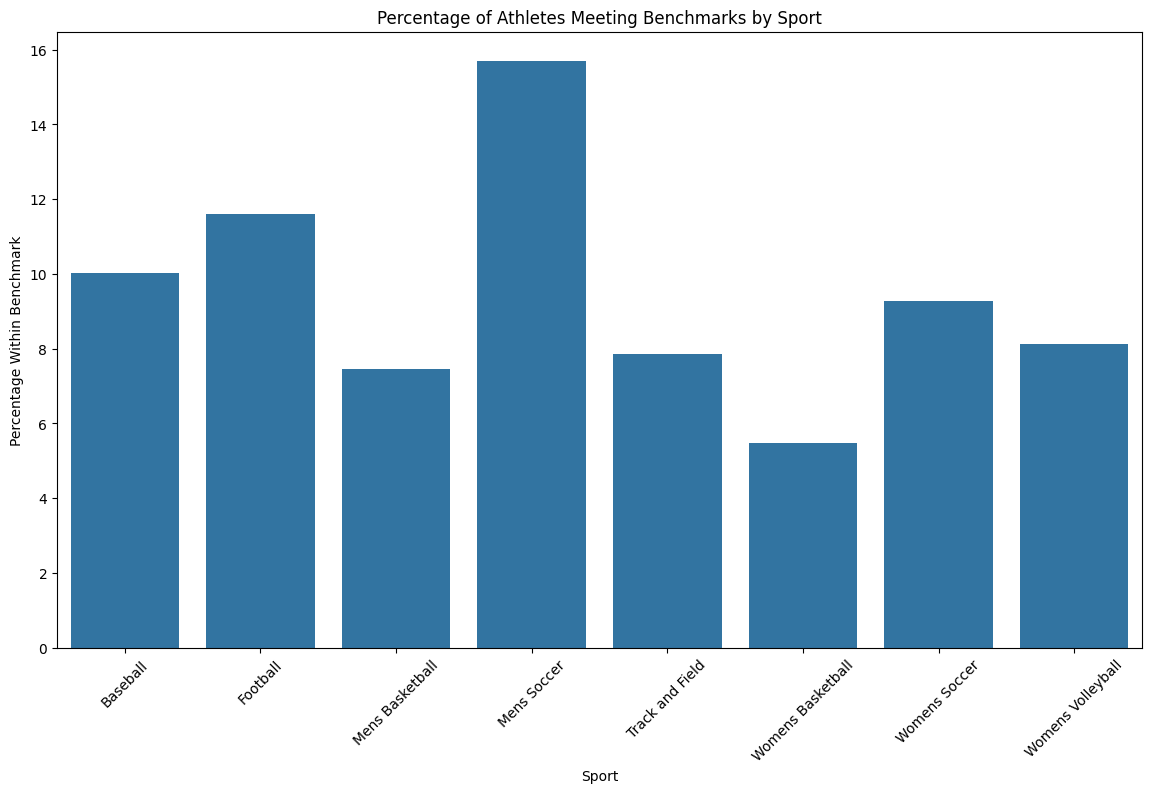

In [51]:
# Visualization of benchmark comparison
plt.figure(figsize=(14, 8))
sns.barplot(x='sbu_sport_x', y='percentage_within_benchmark', data=team_performance)
plt.title('Percentage of Athletes Meeting Benchmarks by Sport')
plt.xlabel('Sport')
plt.ylabel('Percentage Within Benchmark')
plt.xticks(rotation=45)
plt.show()